In [50]:
import re
from pathlib import Path
from functools import cmp_to_key

import numpy as np
from matplotlib import pyplot as plt

In [7]:
data_path = Path("../data/pre_accu")

Text(0, 0.5, 'Average Successful Prediction Ratio')

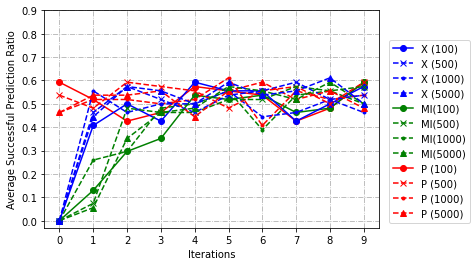

In [71]:
style_dict = {'cond_pre_accu': 'r', 'MI_pre_accu': 'g', 'X2_pre_accu': 'b'}
metric_dict = {'cond_pre_accu': 'P ', 'MI_pre_accu': 'MI', 'X2_pre_accu': 'X '}
metirc_order = {'X': 1, 'MI': 2, 'P': 3}
color_dict = {'100': 'o-', '500': 'x--', '1000': '.--', '5000': '^--'}

def legend_sort(x, y):
    x_labels = re.split('[()]', x[1])
    x_m_order = metirc_order[x_labels[0].strip()]
    x_n_order = int(x_labels[1])
    
    y_labels = re.split('[()]', y[1])
    y_m_order = metirc_order[y_labels[0].strip()]
    y_n_order = int(y_labels[1])
    
    if x_m_order != y_m_order:
        return x_m_order - y_m_order
    else:
        return x_n_order - y_n_order

for sub_dir in data_path.glob('*'):
    nodes = sub_dir.stem
    for csv_path in sub_dir.glob('*.csv'):
        accu_name = csv_path.stem
        data = np.genfromtxt(csv_path, delimiter=',')
        line, = plt.plot(data, color_dict[nodes]+style_dict[accu_name])
        line.set_label(f'{metric_dict[accu_name]}({nodes})')

handles, labels = plt.gca().get_legend_handles_labels()
handles, labels = zip(*sorted(zip(handles, labels), key=cmp_to_key(legend_sort)))

plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 1, 0.1))
plt.grid(linestyle='-.')
plt.legend(bbox_to_anchor=(1.15, 0), handles=handles, labels=labels, loc='lower center')
plt.xlabel('Iterations')
plt.ylabel('Average Successful Prediction Ratio')